# 단순 1010 패턴

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

import random
import pandas as pd
import matplotlib.pyplot as plt

## 실제 데이터 소스

In [4]:
def generate_real():
    real_data = torch.FloatTensor(
        [random.uniform(0.8, 1.0),
         random.uniform(0.0, 0.2),
         random.uniform(0.8, 1.0),
         random.uniform(0.0, 0.2)]
    )
    return real_data

## 판별기 만들기

In [17]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(4, 3),
            nn.Sigmoid(),
            nn.Linear(3, 1),
            nn.Sigmoid()
        )

        self.loss_function = nn.MSELoss()
        self.optimiser = optim.SGD(self.parameters(), lr=0.01)

        self.counter = 0
        self.progress = []

    def forward(self, inputs):
        return self.model(inputs)

    
    def train(self, inputs, targets):
        outputs = self.forward(inputs)

        loss = self.loss_function(outputs, targets)

        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())

        if self.counter % 10000 == 0:
            print('counter = ', self.counter)

        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16, 8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))

## 판별기 테스트하기

In [8]:
def generate_random(size):
    random_data = torch.rand(size)
    return random_data

In [19]:
D = Discriminator()

for i in range(10000):
    D.train(generate_real(), torch.FloatTensor([1.0]))
    D.train(generate_random(4), torch.FloatTensor([0.0]))

counter =  10000
counter =  20000


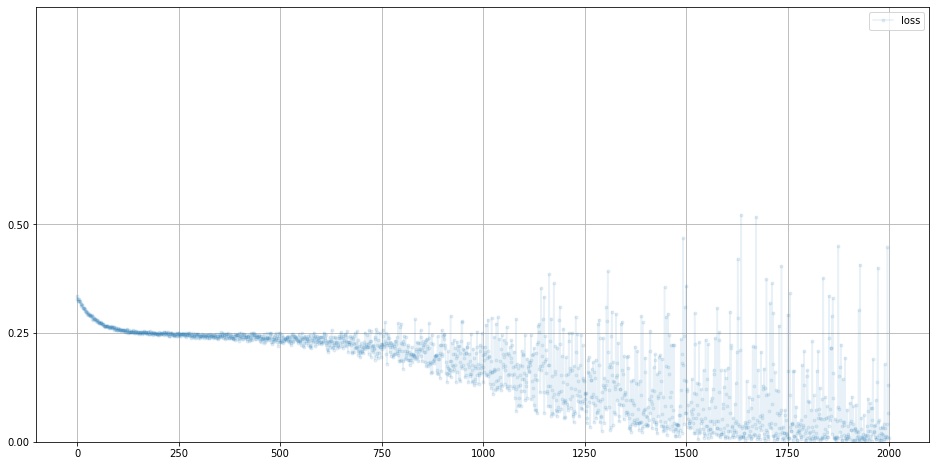

In [21]:
D.plot_progress()

In [23]:
print(D.forward(generate_real()).item())
print(D.forward(generate_random(4)).item())

0.7444989681243896
0.06168908253312111


## 생성기 만들기

In [24]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(1, 3),
            nn.Sigmoid(),
            nn.Linear(3, 4),
            nn.Sigmoid()
        )

        self.optimiser = optim.SGD(self.parameters(), lr=0.01)

        self.counter = 0
        self.progress = []

    def forward(self, inputs):
        return self.model(inputs)

    def train(self, D, inputs, targets):
        g_output = self.forward(inputs)

        d_output = D.forward(g_output)

        loss = D.loss_function(d_output, targets)
        
        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())

        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

## 생성기 결과 확인하기

In [25]:
G = Generator()
G.forward(torch.FloatTensor([0.5]))

tensor([0.6810, 0.7697, 0.3889, 0.3988], grad_fn=<SigmoidBackward>)

## GAN 훈련하기

In [30]:
G = Generator()

for i in range(10000):
    D.train(generate_real(), torch.FloatTensor([1.0]))
    D.train(G.forward(torch.FloatTensor([0.5])).detach(), torch.FloatTensor([0.0]))

    G.train(D, torch.FloatTensor([0.5]), torch.FloatTensor([1.0]))

counter =  30000
counter =  40000


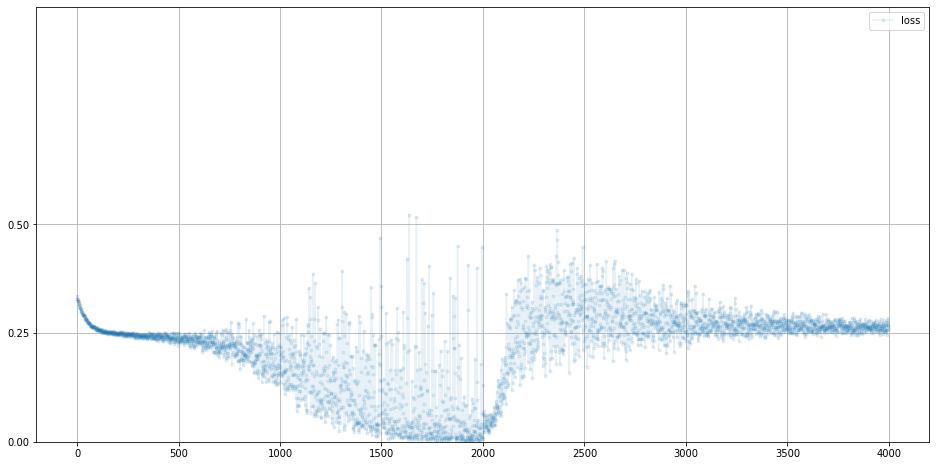

In [31]:
D.plot_progress()

이전 plot은 손실이 0으로 수렴하였지만 위의 plot은 0.25에 수렴한다.  
- 판별기가 잘 판단하지 못할 경우 0.5의 값을 내놓음
- 사용한 값이 평균 제곱 오차여서 0.5의 제곱인 0.25의 값으로 수렴

In [32]:
G.forward(torch.FloatTensor([0.5]))

tensor([0.9799, 0.0159, 0.9797, 0.0145], grad_fn=<SigmoidBackward>)